In [2]:
## Question 1 - Autoencoder

# Import libraries
#from google.colab import drive
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
#drive.mount('/content/gdrive/',force_remount=True)

In [ ]:
# Define function that reads file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Extract data from pickle files
data1 = unpickle('/content/gdrive/MyDrive/data_batch_1')
data2 = unpickle('/content/gdrive/MyDrive/data_batch_2')
data3 = unpickle('/content/gdrive/MyDrive/data_batch_3')
data4 = unpickle('/content/gdrive/MyDrive/data_batch_4')
data5 = unpickle('/content/gdrive/MyDrive/data_batch_5')
data_test = unpickle('/content/gdrive/MyDrive/test_batch')

In [ ]:
# Concatenate all five extracted subsets of training data
x_train_data = np.concatenate((list(data1.values())[2],list(data2.values())[2],list(data3.values())[2],list(data4.values())[2],list(data5.values())[2]),axis=0)
# Extract test data from its pickle file
x_test_data = list(data_test.values())[2]


# Normalize pixel values
x_train_data = x_train_data.astype('float32') / 255.
x_test_data = x_test_data.astype('float32') / 255.

# Define list that will hold reshaped training set images
train_data = []
# For each image...
for i in range(len(x_train_data)):
    # Reshape to 32x32x3
    a = x_train_data[i].reshape(3,1024).T.reshape(32,32,3)
    # Add image to list of all training set images
    train_data.append(a)
# Convert list of training images to array
x_train_data = np.array(train_data)

# Define list that will hold reshaped test set images
test_data = []
# For each image...
for i in range(len(x_test_data)):
    # Reshape to 32x32x3
    a = x_test_data[i].reshape(3,1024).T.reshape(32,32,3)
    # Add image to list of all test set images
    test_data.append(a)
# Convert list of test images to array
x_test_data = np.array(test_data)

In [ ]:
# Define image input shape
input_img = keras.Input(shape=(32, 32, 3))

# Add 64-neuron layer with a 3x3 kernel, ReLU activation function, and padding that maintains 32x32 dimensions
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
# Conduct pooling to reduce images to 16x16 dimension
x = layers.MaxPooling2D((2, 2), padding='same')(x)
# Add 32-neuron layer with a 3x3 kernel, ReLU activation function, and padding that maintains 32x32 dimensions
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
# Conduct pooling to reduce images to 8x8 dimension
x = layers.MaxPooling2D((2, 2), padding='same')(x)
# Add 16-neuron layer with a 3x3 kernel, ReLU activation function, and padding that maintains 16x16 dimensions
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
# Conduct pooling to reduce images to 4x4 dimension
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# We have gotten the representation down to its most compressed form -- 4x4x8.
# We will now expand it back out to 32x32x3.

# Add 16-neuron layer with a 3x3 kernel, ReLU activation function, and padding that maintains 4x4 dimensions
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
# Conduct up-sampling to expand images to 8x8 dimension
x = layers.UpSampling2D((2, 2))(x)
# Add 32-neuron layer with a 3x3 kernel, ReLU activation function, and padding that maintains 8x8 dimensions
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
# Conduct up-sampling to expand images to 16x16 dimension
x = layers.UpSampling2D((2, 2))(x)
# Add 64-neuron layer with a 3x3 kernel, ReLU activation function, and padding that maintains 16x16 dimensions
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
# Conduct up-sampling to expand images to 32x32 dimension
x = layers.UpSampling2D((2, 2))(x)
# Add final layer with a 3x3 kernel that reduces dimensionality from 32x32x64 to 32x32x3.
# The activation function for the autoencoder is sigmoid even though, for actually solving
# this multi-class classification problem, we'd use a softmax.
decoded = layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

# Define model that involves all previously defined steps
autoencoder = keras.Model(input_img, decoded)
# Define model with ADAM optimizer and binary_crossentropy loss function. The loss function for this autoencoder model is binary
# cross-entropy even though, for actually solving this multi-class problem, we'd use categorical cross-entropy.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Fit autoencoder using training and test sets
autoencoder.fit(x_train_data, x_train_data,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test_data, x_test_data))

Epoch 1/10
391/391 [==============================] - 309s 791ms/step - loss: 0.5995 - val_loss: 0.5855
Epoch 2/10
391/391 [==============================] - 306s 781ms/step - loss: 0.5819 - val_loss: 0.5807
Epoch 3/10
391/391 [==============================] - 310s 793ms/step - loss: 0.5788 - val_loss: 0.5789
Epoch 4/10
391/391 [==============================] - 306s 782ms/step - loss: 0.5766 - val_loss: 0.5769
Epoch 5/10
391/391 [==============================] - 305s 781ms/step - loss: 0.5749 - val_loss: 0.5749
Epoch 6/10
391/391 [==============================] - 309s 791ms/step - loss: 0.5739 - val_loss: 0.5742
Epoch 7/10
391/391 [==============================] - 308s 787ms/step - loss: 0.5731 - val_loss: 0.5739
Epoch 8/10
391/391 [==============================] - 310s 793ms/step - loss: 0.5725 - val_loss: 0.5733
Epoch 9/10
391/391 [==============================] - 305s 780ms/step - loss: 0.5720 - val_loss: 0.5726
Epoch 10/10
391/391 [==============================] - 303s 776m

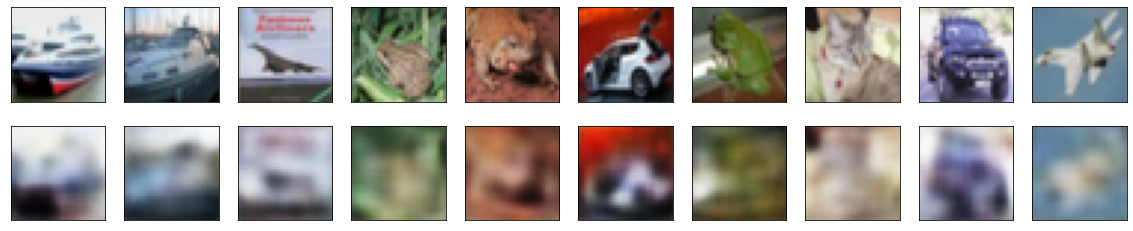

In [ ]:
# Use fit model to predict what test set images should look like
decoded_imgs = autoencoder.predict(x_test_data)

## Print 10 true images and the model's best estimation for those 10 images
n = 10

plt.figure(figsize=(20, 4))
# For each of the 10 images...
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_data[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Model did not work especially well, as we see a training error and test error of ~.57, and the reconstructed images do not have much definition at all. I tried a bunch of combinations of activation functions, hidden layer sizes, etc... but as long as the model foced the images into 4x4 cells, it was very challenging to get high-acuity images coming out.

In [ ]:
## Question 2 - Multi-Class Image Classification

# Going to build this model using Sequential() now that we're not doing encoding-decoding sections (though we still could
# have used Sequential() for that too.)
from keras.models import Sequential


# Now that we're performing the classification task rather than merely autoencoding the images, we'll need the labels
x_train_labels = np.concatenate((list(data1.values())[1],list(data2.values())[1],list(data3.values())[1],list(data4.values())[1],list(data5.values())[1]),axis=0)
x_test_labels = np.array(list(data_test.values())[1])

labs_training = np.zeros((len(x_train_labels),10))
labs_testing = np.zeros((len(x_test_labels),10))

for i in range(len(x_train_labels)):
    label = x_train_labels[i]
    labs_training[i,label] = 1
    
for i in range(len(x_test_labels)):
    label = x_test_labels[i]
    labs_testing[i,label] = 1

In [ ]:
# Part A
# Start with empty sequential model
model = Sequential()
# Add pair of 32-neuron hidden layers with ReLU activation function, 3x3 kernel, stride length of 1 in both dimensions, and padding that maintains 32x32 shape
model.add(layers.Conv2D(32, (2,2), strides=(1,1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', padding='same'))
# Max pooling of 2x2 sections to get dimensionality of each image down to 16x16
model.add(layers.MaxPooling2D((2, 2)))
# Add pair of 64-neuron hidden layers with ReLU activation function, 3x3 kernel, stride length of 1 in both dimensions, and padding that maintains 16x16 shape
model.add(layers.Conv2D(64, (2,2), strides=(1,1), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='same'))
# Max pooling of 2x2 sections to get dimensionality of each image down to 8x8
model.add(layers.MaxPooling2D((2, 2)))
# Add pair of 128-neuron hidden layers with ReLU activation function, 3x3 kernel, stride length of 1 in both dimensions, and padding that maintains 8x8 shape
model.add(layers.Conv2D(128, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same'))
# Max pooling of 2x2 sections to get dimensionality of each image down to 4x4
model.add(layers.MaxPooling2D((2, 2)))
# Flatten 4x4x128 network into 2048-entry vector
model.add(layers.Flatten())
# Condense 2048 dimensions to 128 dimensions
model.add(layers.Dense(128, activation='relu'))
# Get to output, a 10-dimension softmax multi-class prediction
model.add(layers.Dense(10, activation='softmax'))
# Compile model using categorical cross-entropy as loss function and including class prediction accuracy in the performance visualization
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_data, labs_training, epochs=10, batch_size=64, validation_data=(x_test_data, labs_testing))

Epoch 1/10
782/782 [==============================] - 339s 433ms/step - loss: 1.0078 - accuracy: 0.6410 - val_loss: 0.8701 - val_accuracy: 0.6937
Epoch 2/10
782/782 [==============================] - 343s 439ms/step - loss: 0.7954 - accuracy: 0.7213 - val_loss: 0.8550 - val_accuracy: 0.6999
Epoch 3/10
782/782 [==============================] - 338s 432ms/step - loss: 0.6615 - accuracy: 0.7688 - val_loss: 0.7289 - val_accuracy: 0.7528
Epoch 4/10
782/782 [==============================] - 337s 431ms/step - loss: 0.5592 - accuracy: 0.8046 - val_loss: 0.7282 - val_accuracy: 0.7589
Epoch 5/10
782/782 [==============================] - 337s 431ms/step - loss: 0.4720 - accuracy: 0.8342 - val_loss: 0.7320 - val_accuracy: 0.7623
Epoch 6/10
782/782 [==============================] - 337s 431ms/step - loss: 0.3855 - accuracy: 0.8644 - val_loss: 0.8209 - val_accuracy: 0.7520
Epoch 7/10
782/782 [==============================] - 340s 435ms/step - loss: 0.3138 - accuracy: 0.8879 - val_loss: 0.8015 -

We see some clear overfitting in the seventh epoch and again in the tenth epoch (I had already run this model for one epoch before the displayed epochs). We will retrain the model, but train for only 5 epochs (and then one additional epoch to match the one prerequisite epoch, for a total of 6 epochs) to avoid the large overtraining in the ninth epoch.

In [ ]:
# Start with empty sequential model
model = Sequential()
# Add pair of 32-neuron hidden layers with ReLU activation function, 3x3 kernel, stride length of 1 in both dimensions, and padding that maintains 32x32 shape
model.add(layers.Conv2D(32, (2,2), strides=(1,1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', padding='same'))
# Max pooling of 2x2 sections to get dimensionality of each image down to 16x16
model.add(layers.MaxPooling2D((2, 2)))
# Add pair of 64-neuron hidden layers with ReLU activation function, 3x3 kernel, stride length of 1 in both dimensions, and padding that maintains 16x16 shape
model.add(layers.Conv2D(64, (2,2), strides=(1,1), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='same'))
# Max pooling of 2x2 sections to get dimensionality of each image down to 8x8
model.add(layers.MaxPooling2D((2, 2)))
# Add pair of 128-neuron hidden layers with ReLU activation function, 3x3 kernel, stride length of 1 in both dimensions, and padding that maintains 8x8 shape
model.add(layers.Conv2D(128, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same'))
# Max pooling of 2x2 sections to get dimensionality of each image down to 4x4
model.add(layers.MaxPooling2D((2, 2)))
# Flatten 4x4x128 network into 2048-entry vector
model.add(layers.Flatten())
# Condense 2048 dimensions to 128 dimensions
model.add(layers.Dense(128, activation='relu'))
# Get to output, a 10-dimension softmax multi-class prediction
model.add(layers.Dense(10, activation='softmax'))
# Compile model using categorical cross-entropy as loss function and including class prediction accuracy in the performance visualization
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
# Fit model, this time using only 7 epochs
model.fit(x_train_data, labs_training, epochs=5, batch_size=64, validation_data=(x_test_data, labs_testing))

Epoch 1/5
782/782 [==============================] - 345s 441ms/step - loss: 1.4747 - accuracy: 0.4557 - val_loss: 1.0871 - val_accuracy: 0.6157
Epoch 2/5
782/782 [==============================] - 339s 434ms/step - loss: 0.9834 - accuracy: 0.6497 - val_loss: 0.9027 - val_accuracy: 0.6870
Epoch 3/5
782/782 [==============================] - 343s 439ms/step - loss: 0.7601 - accuracy: 0.7330 - val_loss: 0.7536 - val_accuracy: 0.7386
Epoch 4/5
782/782 [==============================] - 338s 432ms/step - loss: 0.6289 - accuracy: 0.7791 - val_loss: 0.7769 - val_accuracy: 0.7372
Epoch 5/5
782/782 [==============================] - 337s 431ms/step - loss: 0.5222 - accuracy: 0.8170 - val_loss: 0.7130 - val_accuracy: 0.7573


In [ ]:
model.fit(x_train_data, labs_training, epochs=1, batch_size=64, validation_data=(x_test_data, labs_testing))

782/782 [==============================] - 339s 434ms/step - loss: 0.4314 - accuracy: 0.8496 - val_loss: 0.7452 - val_accuracy: 0.7633


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 128)        

I tried both 3x3 and 2x2 kernels, but ultimately went with a combination; in such a small image (32x32 pixels), exclusively 3x3 kernels were relying on too high of a percentage of the whole image. For output activation and loss functions, I obviously needed to use softmax and categorical cross-entropy, respectively, because this is a multi-class classification problem. For kernel strides, I just used (the default) one-pixel stride size in both dimensions, again because the original images were so small in dimension (32x32). For padding, I used padding to maintain the 32x32 dimensionality of each image for the first two hidden layers because the number of pixels was still relatively large. I had assumed that, once a pooling had been performed, continuing to pad to retain the current dimensions (16x16, 8x8, or 4x4) would be damaging because including either one or two padding pixels would lead to such a significant percentage of the pixels being padding (1/16 or 2/16, 1/8 or 2/8, 1/4 or 2/4). However, it turned out that keeping the padding led to better outcomes, so I kept it for all hidden layers. Network depth was pretty straightforward - three sets of two hidden layers each, each with twice the complexity of the previous layer (32 nodes->64 nodes->128 nodes) and a 2x2 MaxPooling() layer in between. Probably could have gotten better performance from a deeper network, but this seemed to strike a good balance between compute cost and test accuracy.

In [ ]:
## Part B

# Import library that contains VGG weights
from tensorflow.keras.applications import VGG16
# Construct variable that uses VGG weights for 32x32x3 input image
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))
# Define transfer learning model
model2 = Sequential()
# Freeze VGG weights
conv_base.trainable=False
# Add VGG weights to model
model2.add(conv_base)
# Add final dense 10-element layer that will contain softmax probabilities
model2.add(layers.GlobalMaxPool2D())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10,activation='softmax'))
# Compile model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Print model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_max_pooling2d (Global (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Fit transfer learning model to CIFAR10 dataset's training set and evaluate its performance against test set
model2.fit(x_train_data, labs_training, epochs=6, batch_size=64, validation_data=(x_test_data, labs_testing))

Epoch 1/6
782/782 [==============================] - 626s 800ms/step - loss: 1.3946 - accuracy: 0.5178 - val_loss: 1.2875 - val_accuracy: 0.5500
Epoch 2/6
782/782 [==============================] - 627s 802ms/step - loss: 1.2006 - accuracy: 0.5816 - val_loss: 1.2132 - val_accuracy: 0.5761
Epoch 3/6
782/782 [==============================] - 621s 794ms/step - loss: 1.1466 - accuracy: 0.6007 - val_loss: 1.1810 - val_accuracy: 0.5838
Epoch 4/6
782/782 [==============================] - 625s 799ms/step - loss: 1.1096 - accuracy: 0.6136 - val_loss: 1.1541 - val_accuracy: 0.5954
Epoch 5/6
782/782 [==============================] - 627s 802ms/step - loss: 1.0791 - accuracy: 0.6243 - val_loss: 1.1583 - val_accuracy: 0.5929
Epoch 6/6
782/782 [==============================] - 622s 795ms/step - loss: 1.0533 - accuracy: 0.6339 - val_loss: 1.1440 - val_accuracy: 0.5960


It appears as though the deep convolutional neural network that we built performed with higher accuracy and trained more quickly than the transfer learning neural network.

In [141]:
## Question 3 -- Recurrent Neural Networks

# Part 1
## Question 3

# Import libraries
import pandas as pd
import itertools
import string
import tensorflow.keras.layers as tfkl
import tensorflow.keras as tfk
import numpy as np
from keras.models import Sequential
import random
from sklearn.model_selection import train_test_split

# Load spam dataset
#spam_data = pd.read_csv('/content/gdrive/MyDrive/SPAM_detection.csv')
spam_data = pd.read_csv('SPAM_detection.csv')

In [142]:
spam_data.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [143]:
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

# Define list that will contain entries for each ordered set of words in each message
word_corpus = []

# For each message...
for i in range(len(spam_data.Message)):
    # Append the cleaned list of that message's words to list of all message's sets of words
    word_corpus.append(clean_doc(spam_data.Message[i]))

    
# Create list of all unique words in corpus
all_words_list = list(itertools.chain.from_iterable(word_corpus))
dictionary = sorted(list(set(all_words_list)))

# Create encoding and reverse encoding
word_indices = dict((c, i) for i, c in enumerate(dictionary))
indices_word = dict((i, c) for i, c in enumerate(dictionary))

word_counts=[]
for i in range(len(word_corpus)):
    word_counts.append(len(word_corpus[i]))

print(sum(word_counts)/len(word_counts))

14.609117013639628


In [144]:
## Cap each message at length of 20 words
for i in range(len(word_corpus)):
    word_corpus[i] = word_corpus[i][0:20]

In [145]:
indices = list(range(len(word_corpus)))
train, test = train_test_split(indices, test_size=0.25)

# Create 5572x20xdictionary matrix to hold numerical representations of each message.
# We chose 20 as the maximum message length (in words) based on the distribution of message lengths
X = np.zeros((len(word_corpus),20,len(dictionary)), dtype=np.uint8)
for i, seq in enumerate(word_corpus):
    for t, char in enumerate(seq):
        X[i, t, word_indices[char]] = 1
        
# Create vector of labels
Y = spam_data.category_val

X_train = X[train,:]
X_test = X[test,:]
Y_train = Y[train]
Y_test = Y[test]

In [146]:
# Define RNN model
spam_rnn = Sequential()
# Add LSTM layer
spam_rnn.add(tfkl.LSTM(128, input_shape=(20, len(dictionary))))
# Add dense layer that converges to single sigmoid value, as this is a binary classification problem
spam_rnn.add(tfkl.Dense(1,activation="sigmoid"))
# Compile using binary cross-entropy, again because this is a binary classification problem
spam_rnn.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01), metrics=['accuracy'])

In [148]:
# Fit model
spam_rnn.fit(X_train,Y_train, epochs=20, batch_size=1024, validation_data=(X_test, Y_test))

Epoch 1/20
5/5 [==============================] - 16s 3s/step - loss: 0.3830 - accuracy: 0.8662 - val_loss: 0.3940 - val_accuracy: 0.8650
Epoch 2/20
5/5 [==============================] - 16s 3s/step - loss: 0.3818 - accuracy: 0.8662 - val_loss: 0.3939 - val_accuracy: 0.8650
Epoch 3/20
5/5 [==============================] - 16s 3s/step - loss: 0.3645 - accuracy: 0.8662 - val_loss: 0.4429 - val_accuracy: 0.9038
Epoch 4/20
5/5 [==============================] - 16s 3s/step - loss: 0.3991 - accuracy: 0.8794 - val_loss: 0.3770 - val_accuracy: 0.8650
Epoch 5/20
5/5 [==============================] - 16s 3s/step - loss: 0.3536 - accuracy: 0.8662 - val_loss: 0.3492 - val_accuracy: 0.8650
Epoch 6/20
5/5 [==============================] - 17s 3s/step - loss: 0.3982 - accuracy: 0.8837 - val_loss: 0.3581 - val_accuracy: 0.8650
Epoch 7/20
5/5 [==============================] - 16s 3s/step - loss: 0.3207 - accuracy: 0.8665 - val_loss: 0.4554 - val_accuracy: 0.9131
Epoch 8/20
5/5 [==================

In [150]:
spam_ham_predictions = spam_rnn.predict(X_test)

In [149]:
1-(len(Y_test[Y_test==1])/len(Y_test))

0.8650394831299354

Performed the above calculation to ensure that the model wasn't merely picking all 0s (not spam), which we can confirm becuse the accuracy on the test set -- .9067 -- is significantly higher than the percentage of HAM messages -- .8722.

In [151]:
## Part B

# Define list that will contain entries for each ordered set of words in each message
letter_corpus = []

# For each message...
for i in range(len(spam_data.Message)):
    # Append the list of that message's characters to list of all message's sets of characters
    letter_corpus.append(list(spam_data.Message[i]))


# Create list of all unique letters in corpus
all_letters_list = list(itertools.chain.from_iterable(letter_corpus))
alphabet = sorted(list(set(all_letters_list)))

# Create encoding and reverse encoding
letter_indices = dict((c, i) for i, c in enumerate(alphabet))
indices_letter = dict((i, c) for i, c in enumerate(alphabet))

# Define list that will hold character count for each message
letter_counts=[]
# For each message...
for i in range(len(letter_corpus)):
    # Add this message's character count
    letter_counts.append(len(letter_corpus[i]))

# Print average number of characters in the 
sum(letter_counts)/len(letter_counts)

80.36898779612348

In [152]:
max_len = 80

In [153]:
## Given that the average number of characters is ~80, cap each message at length of 90 characters
for i in range(len(letter_corpus)):
    letter_corpus[i] = letter_corpus[i][0:max_len]

In [154]:
# Create 5572x90 matrix to hold numerical representations of each message.
# We chose 90 as the maximum message length (in letters) based on the distribution of message lengths
X_letters = np.zeros((len(letter_corpus),max_len), dtype=np.uint8)
for i in range(len(letter_corpus)):
    for j in range(len(letter_corpus[i])):
        X_letters[i][j] = letter_indices[letter_corpus[i][j]]
        
# Create vector of labels
Y = spam_data.category_val

X_letters_train = X_letters[train,:]
X_letters_test = X_letters[test,:]

In [155]:
#for i in range(len(X_letters_train)):
#    X_letters_train[i] = X_letters_train[i].reshape((90,1))
    
#for i in range(len(X_letters_test)):
#    X_letters_test[i] = X_letters_test[i].reshape((90,1))

X_letters_train = X_letters_train.reshape((len(X_letters_train),max_len,1))
X_letters_test = X_letters_test.reshape((len(X_letters_test),max_len,1))

In [156]:
# Start with empty sequential model
model3 = Sequential()
# Add pair of 32-neuron hidden layers with ReLU activation function, 3-character kernel, stride length of 1, and padding that maintains 90-character shape
model3.add(layers.Conv1D(64, (3), strides=(1), activation='relu', padding='same', input_shape=(max_len,1)))
model3.add(layers.Conv1D(64, (3), strides=(1), activation='relu', padding='same'))
# Max pooling of 2-character sections to get dimensionality of each image down to 45
model3.add(layers.MaxPooling1D((2)))
# Add pair of 128-neuron hidden layers with ReLU activation function, 2- and 3-character kernels, stride length of 1 in both dimensions, and padding that maintains 45-character shape
model3.add(layers.Conv1D(128, (2), strides=(1), activation='relu', padding='same'))
model3.add(layers.Conv1D(128, (3), strides=(1), activation='relu', padding='same'))
# Max pooling of 2-character sections to get dimensionality of each image down to 22 characters
model3.add(layers.MaxPooling1D((2)))
# Flatten 4x4x128 network into 2048-entry vector
model3.add(layers.Flatten())
# Condense 2048 dimensions to 128 dimensions
model3.add(layers.Dense(16, activation='relu'))
# Get to output, a 10-dimension softmax multi-class prediction
model3.add(layers.Dense(1, activation='sigmoid'))
# Compile model using categorical cross-entropy as loss function and including class prediction accuracy in the performance visualization
model3.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [157]:
model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 80, 64)            256       
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 80, 64)            12352     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 40, 64)            0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 40, 128)           16512     
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 40, 128)           49280     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 20, 128)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2560)            

In [158]:
# Fit model
model3.fit(X_letters_train,Y_train, epochs=20, batch_size=1024, validation_data=(X_letters_test, Y_test))

Epoch 1/20
5/5 [==============================] - 2s 333ms/step - loss: 0.7139 - accuracy: 0.8014 - val_loss: 0.4579 - val_accuracy: 0.8650
Epoch 2/20
5/5 [==============================] - 1s 277ms/step - loss: 0.3631 - accuracy: 0.8672 - val_loss: 0.3174 - val_accuracy: 0.8658
Epoch 3/20
5/5 [==============================] - 1s 278ms/step - loss: 0.3153 - accuracy: 0.8650 - val_loss: 0.2952 - val_accuracy: 0.8679
Epoch 4/20
5/5 [==============================] - 1s 270ms/step - loss: 0.3000 - accuracy: 0.8674 - val_loss: 0.3134 - val_accuracy: 0.8564
Epoch 5/20
5/5 [==============================] - 1s 272ms/step - loss: 0.3001 - accuracy: 0.8717 - val_loss: 0.2864 - val_accuracy: 0.8650
Epoch 6/20
5/5 [==============================] - 2s 308ms/step - loss: 0.2866 - accuracy: 0.8749 - val_loss: 0.2769 - val_accuracy: 0.8672
Epoch 7/20
5/5 [==============================] - 1s 269ms/step - loss: 0.2737 - accuracy: 0.8677 - val_loss: 0.2681 - val_accuracy: 0.8772
Epoch 8/20
5/5 [====

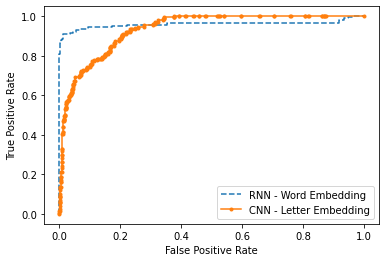

In [162]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

cnn_predict = model3.predict(X_letters_test)

rnn_auc = roc_auc_score(Y_test, spam_ham_predictions)
cnn_auc = roc_auc_score(Y_test, cnn_predict)
# calculate roc curves
rnn_fpr, rnn_tpr, _ = roc_curve(Y_test, spam_ham_predictions)
cnn_fpr, cnn_tpr, _ = roc_curve(Y_test, cnn_predict)
# plot the roc curve for the model
plt.plot(rnn_fpr, rnn_tpr, linestyle='--', label='RNN - Word Embedding')
plt.plot(cnn_fpr, cnn_tpr, marker='.', label='CNN - Letter Embedding')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Based on the ROC curves, it appears that the RNN word embedding model performs better than the CNN letter embedding model. Validation loss and validation accuracy are .2097 and .9160, respectively, for CNN model, and 0.1039 and 0.9785, respectively, for the RNN model. However, it appears that the CNN model is better at identifying those final few, hardest cases, and if those are of the greatest interest, the CNN has better capacity to shift some weights and priorities to predict those cases correctly.